# Data Visualization using matplotlib 
This is a quick exploration of data visualisation using matplot lib. Data visualisation can be defined as the presentation of data in a graphical or pictorial format. It enables decision makers to gain insights and quickly identify trends or patterns. This tutorial focuses on data Visualization using matplotlib. The data used for this analysis can be found [here](https://fred.stlouisfed.org/series/UNRATE)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Download and import the data using pandas

In [5]:
df = pd.read_csv("UNRATE.csv")
df.head(5)

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [16]:
df.dtypes

DATE       object
UNRATE    float64
dtype: object

In [15]:
type(df["DATE"][0])

str

A quick ispection of the data types shows that pandas imported DATE column as string. This need to be converted to the datetime type. To do this pandas function to_datetime() will be used.

In [19]:
df['DATE'] = pd.to_datetime(df['DATE'])
type(df["DATE"][0])

pandas._libs.tslib.Timestamp

The workflow for using matplotlib is as follows:
 - create a plot usibg data
 - customize the appearance of the plot
 - display the plot
 - edith and repeat as desired.

To put this workflow to work, a line chart representing the unemployment rate of 1948(first 12 values of the data set) is ploted below. 


# Single line chart

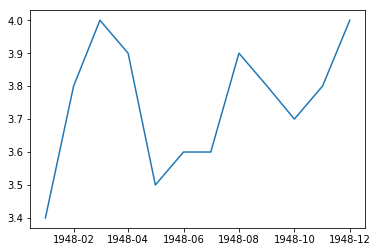

In [21]:
plt.plot(df[0:12]["DATE"],df[0:12]["UNRATE"])
plt.show()

If for any reason the y or x-axis tick labels becomes compacted together and unreadable, yticks() or xticks() can be used to rotate the label to the desired position. As shown below.

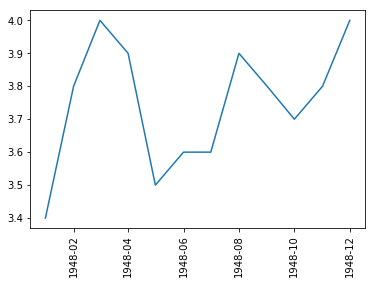

In [22]:
plt.xticks(rotation=90)
plt.plot(df[0:12]["DATE"],df[0:12]["UNRATE"])
plt.show()

Chart title and axis label can be added as shown below.

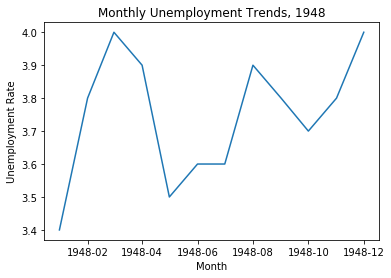

In [23]:
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title( "Monthly Unemployment Trends, 1948")
plt.plot(df[0:12]["DATE"],df[0:12]["UNRATE"])
plt.show()

# Multiple line chart
The chart above is for just one year 1948. In other to study yearly unemployement trend multiple line char can be plotted on the same x-axis. the workflow for creating multiple charts is as follows:
 - create a container for all plots as figure object
 - postion the container on a grid i.e. axes object
 - add visual symbols to the plot i.e values of x-axis and y-axis.
 
multiple line chart for 1948 and 1949 is ploted below

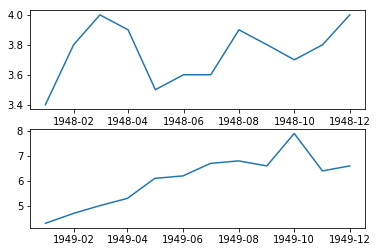

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(df[0:12]["DATE"],df[0:12]["UNRATE"])
ax2.plot(df[12:24]["DATE"],df[12:24]["UNRATE"])
plt.show()

The line chart plotted above is squeezed together and difficult to read. figsize parameter can be used with plt.figure() to customize the chart. Similarly, set_title() can be used to add title to each chart.

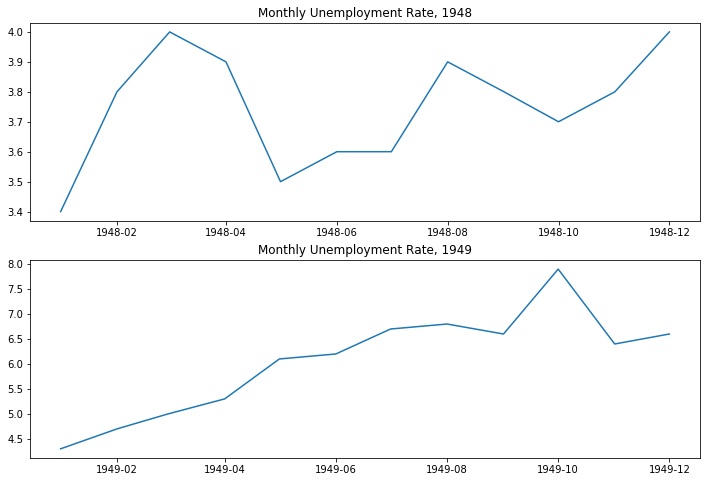

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(df[0:12]["DATE"],df[0:12]["UNRATE"])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(df[12:24]["DATE"],df[12:24]["UNRATE"])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

Say we want to plot from 1948 to 1952, subplot() and a for loop can be used to do that as shown below.

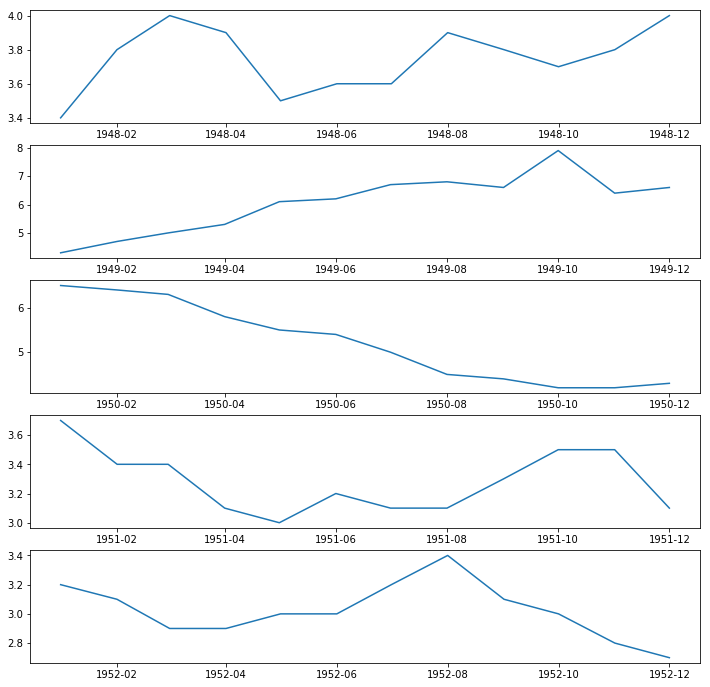

In [28]:
fig = plt.figure(figsize=(12,12))
for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start = i*12
    end = (i+1)*12
    ax.plot(df[start:end]["DATE"], df[start:end]["UNRATE"])
plt.show()

To plot these 5 charts on the same axes, months can be used as x-axis. To extract month from DATE object, pandas.Series.dt accessor can be used to do this. Once this is done, unemployement rate for years 1948 - 1952 can be plotted with UNRATE as y-axis and month as x-axis. The line representing each can be color coded for easy identification.

In [31]:
df["MONTH"] = df["DATE"].dt.month
df.head(12)

,DATE,UNRATE,MONTH
0,1948-01-01,3.4,1
1,1948-02-01,3.8,2
2,1948-03-01,4.0,3
3,1948-04-01,3.9,4
4,1948-05-01,3.5,5
5,1948-06-01,3.6,6
6,1948-07-01,3.6,7
7,1948-08-01,3.9,8
8,1948-09-01,3.8,9
9,1948-10-01,3.7,10


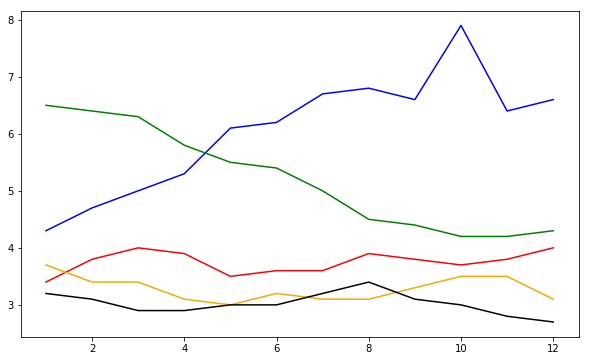

In [35]:
fig = plt.figure(figsize=(10,6))
colors = ["red","blue","green","orange","black"]
for i in range(5):
    start = i*12
    end = (i+1)*12
    plt.plot(df[start:end]["MONTH"], df[start:end]["UNRATE"], c=colors[i])
plt.show()

Chart legend and label can be added using plt.legend() as shown below

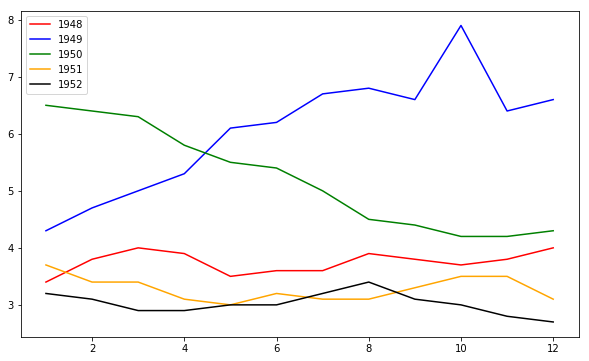

In [37]:
fig = plt.figure(figsize=(10,6))
colors = ["red","blue","green","orange","black"]
for i in range(5):
    start = i*12
    end = (i+1)*12
    plt.plot(df[start:end]["MONTH"], df[start:end]["UNRATE"], c=colors[i], label=str(1948+i))
    plt.legend(loc='upper left')
    
plt.show()

While chart title, x and y-axis lable can be added as shown below.

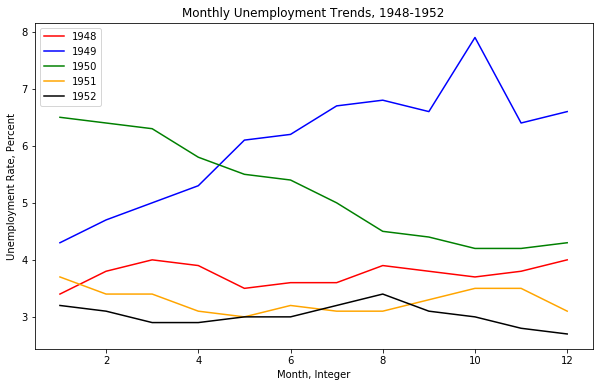

In [38]:
fig = plt.figure(figsize=(10,6))
colors = ["red","blue","green","orange","black"]
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
for i in range(5):
    start = i*12
    end = (i+1)*12
    plt.plot(df[start:end]["MONTH"], df[start:end]["UNRATE"], c=colors[i], label=str(1948+i))
    plt.legend(loc='upper left')
    
plt.show()